## PART 4: Main Func: with Modifier.py
Error: the NaN values for X show up when Modifier can't generate (given the interval) new values.

[MODC]: *** Entering Modifier controller ***
[MODC]: intervals list:  [(1, 100)]

Simulator...
       *** USING validator_controller
       *** USING local_exploration_validator_A
       *** USING fit_curve
       *** OUTPUT fit_curve slope, intercept [ 0.          0.6662842  -0.00101397] -1.7642473710719138 




Residuals:  [ -8.54  -1.11   5.7    9.92 -10.32   1.36  16.08 -12.96  -4.87   4.76]
5
least_fit_indices [0 2 3 4 6 7]
least_fit_points [[1.0, -9.64], [6.26, 8.07], [12.48, 16.31], [21.09, 1.51], [45.48, 42.52], [61.26, 22.29]] 






 list of ranges:  [[1.0, 2.0760869565217392], [3.391304347826087, 29.336956521739125], [35.43478260869565, 74.8913043478261]] 



       *** USING plot_curve


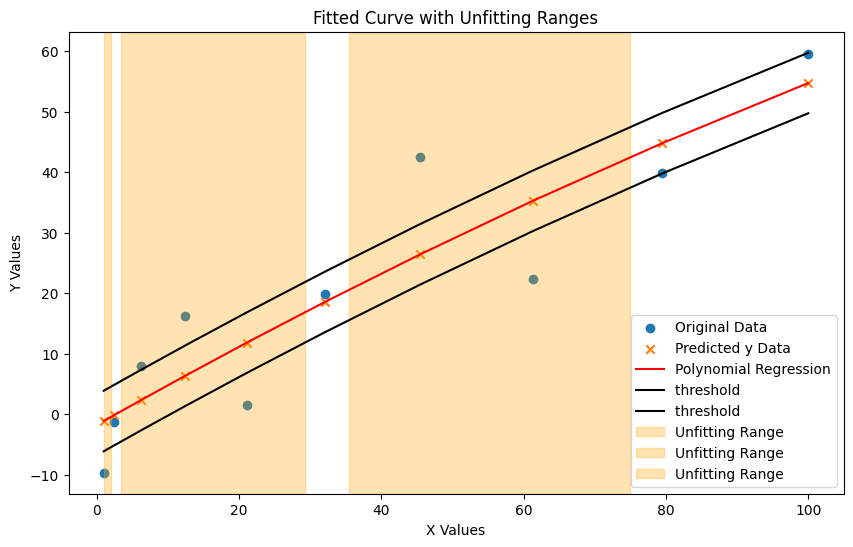

       *** OUTPUT unfitting_ranges [[1.0, 2.0760869565217392], [3.391304347826087, 29.336956521739125], [35.43478260869565, 74.8913043478261]] 

       *** OUTPUT validator_ranges [[1.0, 2.0760869565217392], [3.391304347826087, 29.336956521739125], [35.43478260869565, 74.8913043478261]] 

[MODC]: *** Entering Modifier controller ***
[MODC]: intervals list:  [[1.0, 2.0760869565217392], [3.391304347826087, 29.336956521739125], [35.43478260869565, 74.8913043478261]]

Simulator...
       *** USING validator_controller
THIS IS PONITS  [[1.0, -14.235388969444218], [1.0, -9.64], [3.391304347826087, -20.449668877592337], [6.26, 8.07], [7.681743439704249, -8.454753006322381], [12.48, 16.31], [16.330294164341932, 9.876212541194825], [21.09, 1.51], [29.336956521739125, 6.512643379710745], [35.43478260869565, 10.943132617698888], [41.23902330149093, 24.470999993159364], [45.48, 42.52], [48.08679582180162, 22.728252413523848], [55.97810016962771, 33.56987360144099], [61.26, 22.29], [64.912936344969

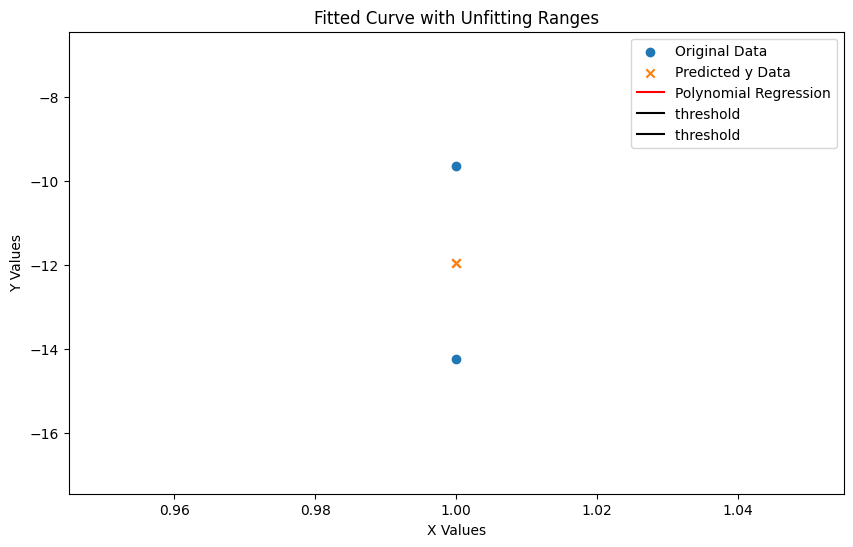

       *** OUTPUT unfitting_ranges [] 

THIS IS self.ranges  [[1.0, 2.0760869565217392], [3.391304347826087, 29.336956521739125], [35.43478260869565, 74.8913043478261]]
THIS IS RANGE  3.391304347826087   29.336956521739125
       *** USING local_exploration_validator_A
       *** USING fit_curve
       *** OUTPUT fit_curve slope, intercept [ 0.          3.64402606 -0.09328206] -23.87396621251254 




Residuals:  [-7.86 12.79 -7.06  9.24 -0.88 -9.98  3.76]
5
least_fit_indices [0 1 2 3 5]
least_fit_points [[3.39, -20.45], [6.26, 8.07], [7.68, -8.45], [12.48, 16.31], [21.09, 1.51]] 






 list of ranges:  [[3.391304347826087, 15.36772062325645], [17.52022062325645, 27.275217391304345]] 



       *** USING plot_curve


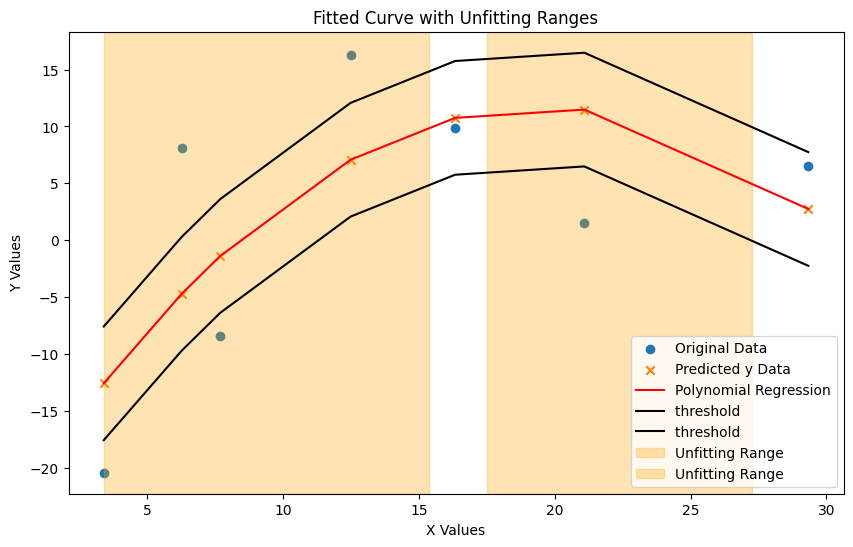

       *** OUTPUT unfitting_ranges [[3.391304347826087, 15.36772062325645], [17.52022062325645, 27.275217391304345]] 

THIS IS self.ranges  [[1.0, 2.0760869565217392], [3.391304347826087, 29.336956521739125], [35.43478260869565, 74.8913043478261]]
THIS IS RANGE  35.43478260869565   74.8913043478261
       *** USING local_exploration_validator_A
       *** USING fit_curve
       *** OUTPUT fit_curve slope, intercept [0.         0.15513603 0.00492521] 7.615200402910428 




Residuals:  [ -8.36   2.08  17.66  -3.73   1.84 -13.31  -1.31   5.13]
5
least_fit_indices [0 2 5 7]
least_fit_points [[35.43, 10.94], [45.48, 42.52], [61.26, 22.29], [74.89, 51.99]] 






 list of ranges:  [[35.43478260869565, 39.78796312829211], [42.299267476118196, 47.435096866351216], [57.29857512722078, 63.9997022587269], [67.40752834568342, 74.8913043478261]] 



       *** USING plot_curve


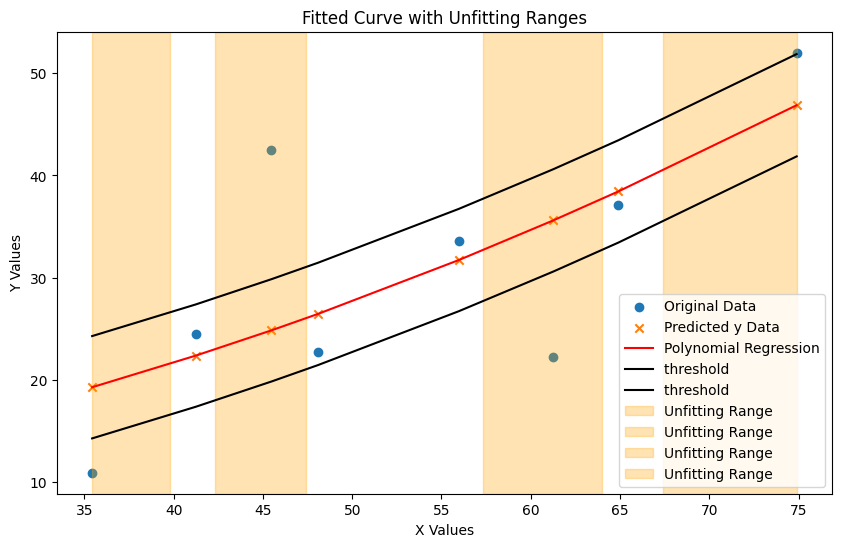

       *** OUTPUT unfitting_ranges [[35.43478260869565, 39.78796312829211], [42.299267476118196, 47.435096866351216], [57.29857512722078, 63.9997022587269], [67.40752834568342, 74.8913043478261]] 

       *** OUTPUT validator_ranges [[3.391304347826087, 15.36772062325645], [17.52022062325645, 27.275217391304345], [35.43478260869565, 39.78796312829211], [42.299267476118196, 47.435096866351216], [57.29857512722078, 63.9997022587269], [67.40752834568342, 74.8913043478261]] 

[MODC]: *** Entering Modifier controller ***
[MODC]: intervals list:  [[3.391304347826087, 15.36772062325645], [17.52022062325645, 27.275217391304345], [35.43478260869565, 39.78796312829211], [42.299267476118196, 47.435096866351216], [57.29857512722078, 63.9997022587269], [67.40752834568342, 74.8913043478261]]

Simulator...
       *** USING validator_controller
THIS IS PONITS  [[3.391304347826087, -0.5737229628620981], [7.759173812983044, -4.583585135440832], [15.36772062325645, 7.992684232227917], [17.52022062325645,

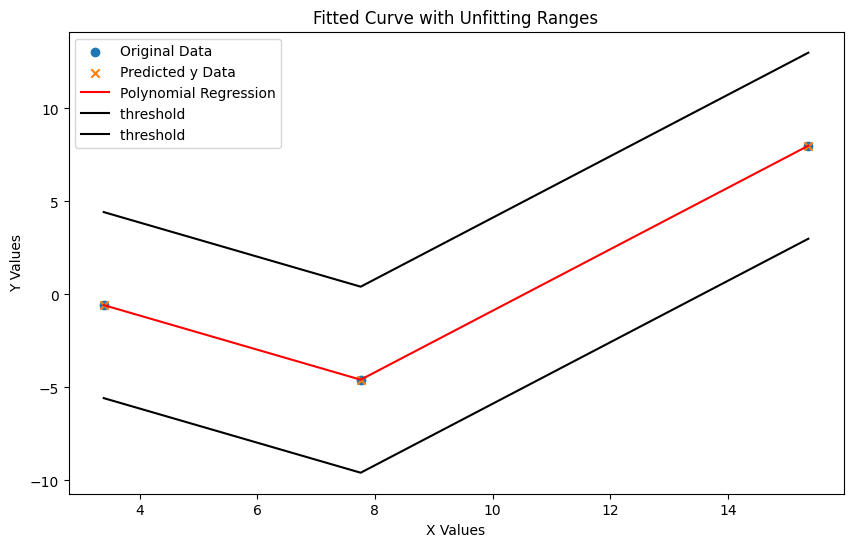

       *** OUTPUT unfitting_ranges [] 

THIS IS self.ranges  [[3.391304347826087, 15.36772062325645], [17.52022062325645, 27.275217391304345], [35.43478260869565, 39.78796312829211], [42.299267476118196, 47.435096866351216], [57.29857512722078, 63.9997022587269], [67.40752834568342, 74.8913043478261]]
THIS IS RANGE  17.52022062325645   27.275217391304345
       *** USING local_exploration_validator_A
       *** USING fit_curve
       *** OUTPUT fit_curve slope, intercept [ 0.         20.94566525 -0.45928098] -224.13863173321582 




Residuals:  [0. 0. 0.]
5
least_fit_indices []
least_fit_points [] 






 list of ranges:  [] 



       *** USING plot_curve


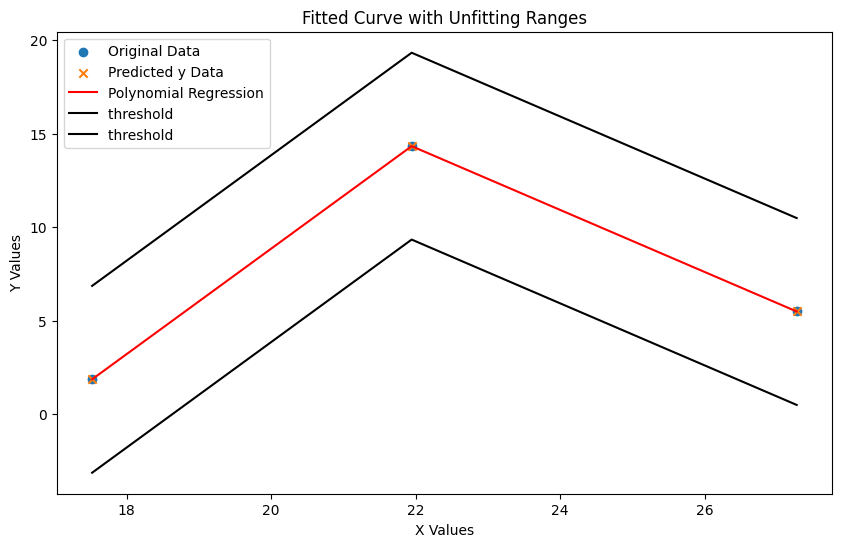

       *** OUTPUT unfitting_ranges [] 

THIS IS self.ranges  [[3.391304347826087, 15.36772062325645], [17.52022062325645, 27.275217391304345], [35.43478260869565, 39.78796312829211], [42.299267476118196, 47.435096866351216], [57.29857512722078, 63.9997022587269], [67.40752834568342, 74.8913043478261]]
THIS IS RANGE  35.43478260869565   39.78796312829211
       *** USING local_exploration_validator_A
       *** USING fit_curve
       *** OUTPUT fit_curve slope, intercept [-3.46944695e-18 -3.74685902e-04 -2.81849024e-02] 61.62227087692159 




Residuals:  [0. 0.]
5
least_fit_indices []
least_fit_points [] 






 list of ranges:  [] 



       *** USING plot_curve


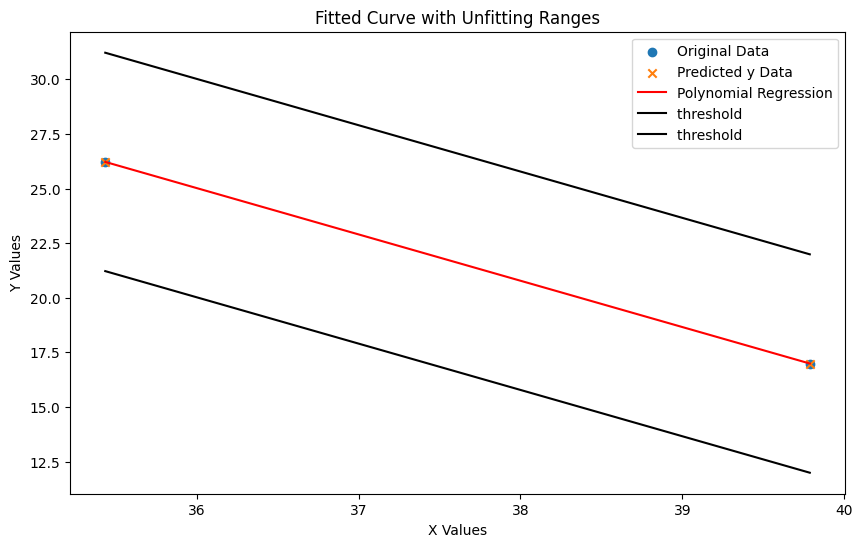

       *** OUTPUT unfitting_ranges [] 

THIS IS self.ranges  [[3.391304347826087, 15.36772062325645], [17.52022062325645, 27.275217391304345], [35.43478260869565, 39.78796312829211], [42.299267476118196, 47.435096866351216], [57.29857512722078, 63.9997022587269], [67.40752834568342, 74.8913043478261]]
THIS IS RANGE  42.299267476118196   47.435096866351216
       *** USING local_exploration_validator_A
       *** USING fit_curve
       *** OUTPUT fit_curve slope, intercept [  0.         234.20947985  -2.62377051] -5182.240468529356 




Residuals:  [0. 0. 0.]
5
least_fit_indices []
least_fit_points [] 






 list of ranges:  [] 



       *** USING plot_curve


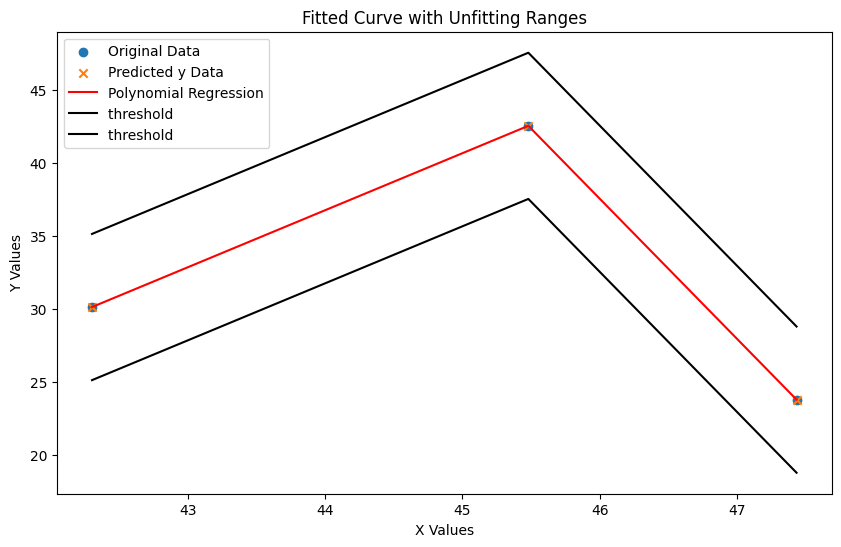

       *** OUTPUT unfitting_ranges [] 

THIS IS self.ranges  [[3.391304347826087, 15.36772062325645], [17.52022062325645, 27.275217391304345], [35.43478260869565, 39.78796312829211], [42.299267476118196, 47.435096866351216], [57.29857512722078, 63.9997022587269], [67.40752834568342, 74.8913043478261]]
THIS IS RANGE  57.29857512722078   63.9997022587269
       *** USING local_exploration_validator_A
       *** USING fit_curve
       *** OUTPUT fit_curve slope, intercept [   0.         -219.29174917    1.81324205] 6651.390266781865 




Residuals:  [0. 0. 0.]
5
least_fit_indices []
least_fit_points [] 






 list of ranges:  [] 



       *** USING plot_curve


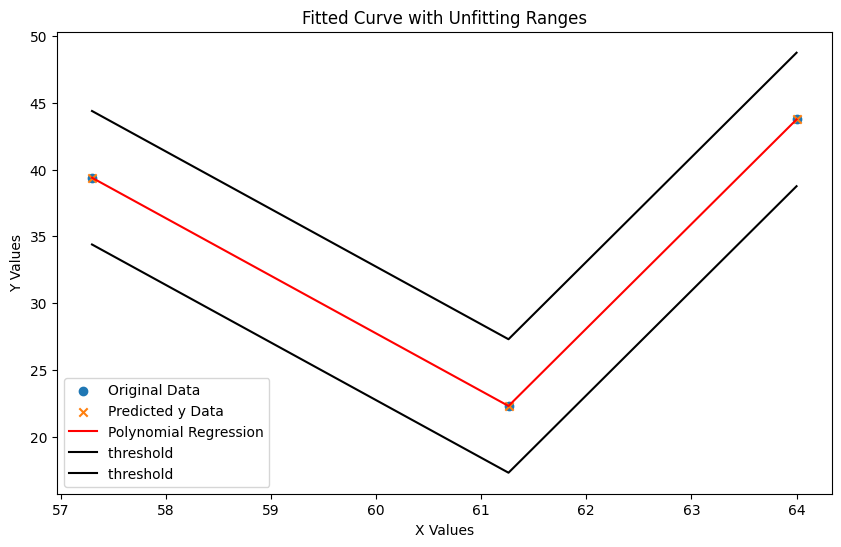

       *** OUTPUT unfitting_ranges [] 

THIS IS self.ranges  [[3.391304347826087, 15.36772062325645], [17.52022062325645, 27.275217391304345], [35.43478260869565, 39.78796312829211], [42.299267476118196, 47.435096866351216], [57.29857512722078, 63.9997022587269], [67.40752834568342, 74.8913043478261]]
THIS IS RANGE  67.40752834568342   74.8913043478261
       *** USING local_exploration_validator_A
       *** USING fit_curve
       *** OUTPUT fit_curve slope, intercept [     0.         -19746.87551545    138.77454078] 700576.8062157157 




Residuals:  [0. 0. 0.]
5
least_fit_indices []
least_fit_points [] 






 list of ranges:  [] 



       *** USING plot_curve


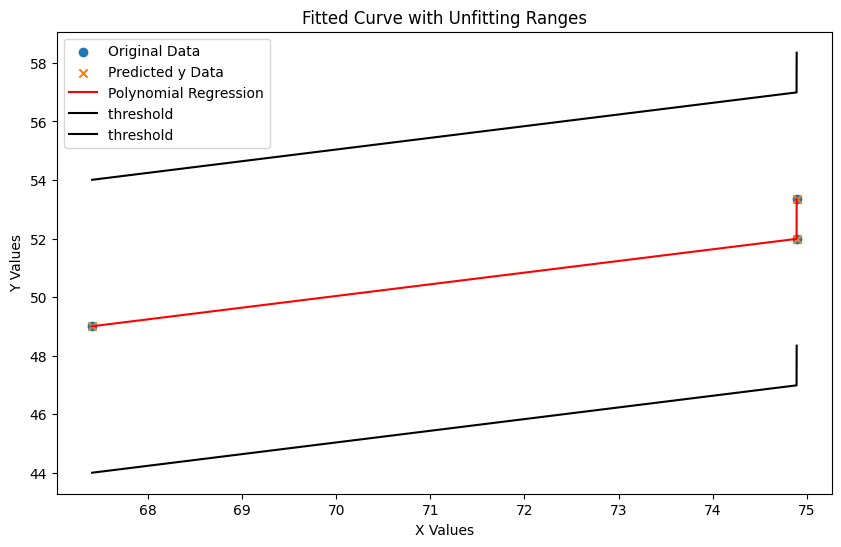

       *** OUTPUT unfitting_ranges [] 

       *** OUTPUT validator_ranges [] 

[MODC]: *** Entering Modifier controller ***
[MODC]: intervals list:  []


In [1]:
# IMPORT LIBRARIES
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler
from itertools import compress

# import global parameters 
# TODO: make interface (widget) to load/change the parameters (low-priority)
from global_settings import mdv,vlv
from global_settings import mdv,simexSettings

#import classes for Modifier, Simulator, and Validator,
from Validator import Validator
from Modifier import Modifier
from Simulator import Simulator
from Logger import Logger

validator = Validator()
modifier = Modifier
simulator = Simulator
logger = Logger()
logger_main_arguments = {}
mainfunc = False

logger_main_arguments["log_contex"] = "overall MAIN stats"
logger_main_arguments["main_status"] = "begin cycle"
logger.log_main(logger_main_arguments)

mainfunc = True
# Initialize interval list
ranges_list=[(mdv["domain_min_range"], mdv["domain_max_range"])]





while mainfunc:
    
    # Calls Modifier Controller
    mod_x_list= modifier.modifier_controller(ranges_list=ranges_list,local_modifier=modifier.local_modifier_A, do_plot=simexSettings["do_plot"])

    # breaks loop if iterations end by granularity reached
    if not mod_x_list: # FALSE IF ["modifier_data_point"] < mdv["modifier_incremental_unit"]:
        logger_main_arguments["log_contex"] = "overall MAIN stats"
        logger_main_arguments["main_status"] = "no generated points"
        logger.log_main(logger_main_arguments)
        break
    
    # Calls Simulator
    mod_x,sim_y_list = simulator.simulator_controller(mod_x_list,selected_function=simulator.sim_func_B)
    assert len(mod_x) == len(sim_y_list)
    
    
    # print('\n\n Modx: ',mod_x,'\nsymx: ',sim_y_list)
    
    # Calls Validator controller
    ranges_list = validator.validator_controller(mod_x_list=np.array(mod_x),sim_y_list=np.array(sim_y_list))
    # Updates interval_list to new range output from validator controller

    if not ranges_list:
        mainfunc = False
        logger_main_arguments["log_contex"] = "overall MAIN stats"
        logger_main_arguments["main_status"] = "no unfit intervals"
        logger.log_main(logger_main_arguments)
logger_main_arguments["log_contex"] = "Overall Stats"                          
logger_main_arguments["main_status"] = "end cycle"
logger.log_main(logger_main_arguments)


# TODO: make a list of history variable that are needed in validator: i-e- number of points total, number of good points, etc. 